#O que está acontecendo nesse monte dados? 

<a target="_blank" href="https://colab.research.google.com/github/glaucogoncalves/p-e/blob/main/lectures/06_eda_1D.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sobre dados


* Uma forma útil de organizar conjuntos de dados é por meio de matrizes, onde cada linha é uma amostra e cada coluna uma característica (dimensão) daquela amostra

|nome|peso|altura|
|---|---|---|
|astra|60.0|1.5|
|alamario|76|1.7|

* Arquivos csv (*comma separated values*)?
  
  nome,peso,altura \\
  astra,60.0,1.5 \\
  alamario,76,1.7

* Tipos de dados: **categóricos**, **ordinais**, **contínuos**
* Forma simples de ver os dados: tabela

In [ ]:
import pandas as pd
dados = { "salarios": [100360, 109770, 96860, 97860, 108930, 124330, 101300, 112710, 106740, 120170] }
salarios = pd.DataFrame(dados)
print(salarios)
!wget https://dasl.datadescription.com/download/data/3205
casas = pd.read_csv("3205",sep="\t")
print(casas)

   salarios
0    100360
1    109770
2     96860
3     97860
4    108930
5    124330
6    101300
7    112710
8    106740
9    120170
--2022-10-18 13:30:19--  https://dasl.datadescription.com/download/data/3205
Resolving dasl.datadescription.com (dasl.datadescription.com)... 45.79.130.90
Connecting to dasl.datadescription.com (dasl.datadescription.com)|45.79.130.90|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 637 [text/plain]
Saving to: ‘3205’

3205                100%[===================>]     637  --.-KB/s    in 0s      

2022-10-18 13:30:19 (85.4 MB/s) - ‘3205’ saved [637/637]

        Price Fireplace
0      142212        No
1      134865       Yes
2      118007       Yes
3      138297       Yes
4      129470       Yes
5      206512        No
6       50709        No
7      108794        No
8       68353        No
9      123266        No
10     309808       Yes
11     157946       Yes
12      80248        No
13     135708        No
14     173723       Yes
1

# Vendo os dados

* Gráficos são úteis para consolidar dados
* Gráfico de barras
* Histograma
* Histograma Condicional

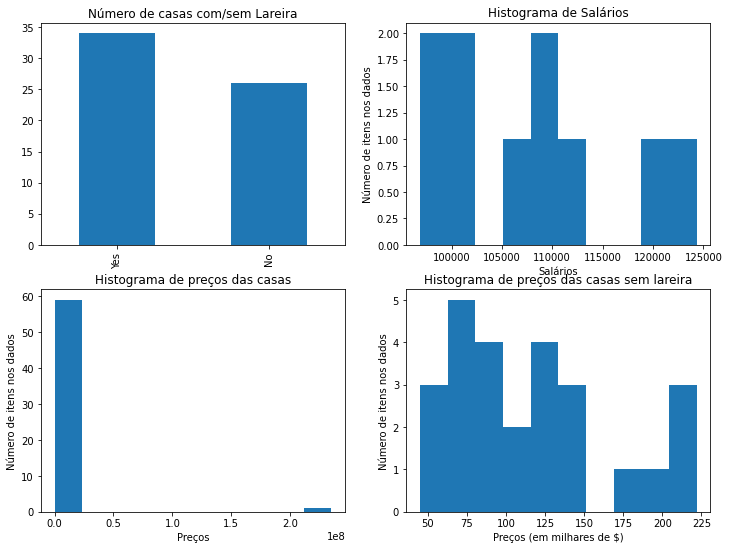

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))

#Gráfico de barras
plt.subplot(2,2,1)
casas["Fireplace"].value_counts().loc[["Yes", "No"]].plot.bar(title="Número de casas com/sem Lareira")
#Histograma
plt.subplot(2,2,2)
salarios["salarios"].plot.hist(title="Histograma de Salários")
plt.xlabel("Salários")
plt.ylabel("Número de itens nos dados")
#Histograma
plt.subplot(2,2,3)
casas["Price"].plot.hist(title="Histograma de preços das casas")
plt.xlabel("Preços")
plt.ylabel("Número de itens nos dados")
#Histograma Condicional
plt.subplot(2,2,4)
casas_sem_lareira = casas[casas["Fireplace"] == "No"]
casas_sem_lareira["Price"].div(1000).plot.hist(title="Histograma de preços das casas sem lareira")
plt.xlabel("Preços (em milhares de $)")
plt.ylabel("Número de itens nos dados")
plt.show()

# Resumindo dados em medidas

## Média

$\bar{x}= media(\{x_i\}) = \frac{\sum_{i=1}^{j=N}x_i}{N}$

* Medida de **localização**, diz para nós onde os dados residem de forma geral

* É um valor que está próximo de todos os dados, **mas não necessariamente está presente no conjunto**

> Cuidado quando reportar dados, para não causar má interpretação ou descrédito. Exemplo: "As famílias no Brasil tem, de modo geral, 2.2 filhos".

* **Para pensar**: Se uma nova pessoa chegasse e você tivesse que acertar seu salário, sem conhecer nada sobre ela. Qual valor você chutaria? Por quê?

* Influenciada por valores discrepantes (*outliers*)

* Propriedades:
* Se os dados forem escalados, a média escala também

$media(\{kx_i\}) = k * media(\{x_i\})$

* Se os dados forem transladados, a média translada também

$media(\{x_i + c\}) = media(\{x_i\}) + c$

* A soma das diferenças dos dados com a média é 0

$\sum_{i=1}^{N}(x_i-\bar{x}) = 0$

* A média é o valor $\mu$ que minimiza a soma das diferenças quadráticas dos dados com a média

$\arg\min_{\mu} \sum_{i=1}^{N}(x_i-\mu)^2 = \bar{x}$

In [ ]:
media = salarios["salarios"].mean()
print("Média de salários: "+str(media))

#Propriedades
print("")
print("==Propriedades==")
print("Média de salários somando 10^6: "+str(salarios["salarios"].add(10**6).mean()))
print("Média de salários multiplicando por 10: "+str(salarios["salarios"].mul(10).mean()))
print("Soma das diferenças pela média: "+str(salarios["salarios"].sub(media).sum()))

from scipy.optimize import minimize
import numpy as np

def obj_func(m, x):
  return sum((x - m[0])**2)

arg = minimize(obj_func,x0=np.array([0]),args=(salarios["salarios"]), method="BFGS")
m = arg.x[0]
print("O argumento mínimo da função (x-m)^2, para os dados dos salários é "+str(m))

#Erros numéricos na otimização (não é assunto de P&E, mas permite mostrar algo interessante)
print("")
print("==Usando as propriedades a seu favor==")
print("Média de preços das casas: "+str(casas["Price"].mean()))
arg = minimize(obj_func,x0=np.array([0]),args=(casas["Price"]), method="BFGS")
m = arg.x[0]
print("O argumento mínimo (com erro numérico) para os dados dos preços das casas é "+str(m))

arg = minimize(obj_func,x0=np.array([0]),args=(casas["Price"].div(10**7)), method="BFGS")
m = arg.x[0]
print("O argumento mínimo da função (x-m)^2, para os dados dos salários é "+str(m*10**7))

#Efeito dos Outliers
print("")
print("==Efeito dos Outliers==")
print("Média de preços das casas: "+str(casas["Price"].mean()))
print("Média de preços das casas sem o discrepante: "+str(casas[casas.Price < 10**6].Price.mean()))

Média de salários: 107903.0

==Propriedades==
Média de salários somando 10^6: 1107903.0
Média de salários multiplicando por 10: 1079030.0
Soma das diferenças pela média: 0.0
O argumento mínimo da função (x-m)^2, para os dados dos salários é 107902.9889932029

==Usando as propriedades a seu favor==
Média de preços das casas: 4052131.65
O argumento mínimo (com erro numérico) para os dados dos preços das casas é 1.9339268727600576
O argumento mínimo da função (x-m)^2, para os dados dos salários é 4052131.662481246

==Efeito dos Outliers==
Média de preços das casas: 4052131.65
Média de preços das casas sem o discrepante: 135981.33898305084


## Desvio Padrão

$\sigma_x=std({x_i})=\sqrt{\frac{1}{N-1}\sum_{i=1}^{N}{(x_i-\bar{x})^2}}$

$std({x_i})=\sqrt{media(\{(x_i-\bar{x})^2\})}$

* Medida de variabilidade / escala
* **Propriedades**
* Transladar os dados **não** muda o desvio padrão
* **Escalar os dados escala o desvio padrão** pelo mesmo valor
* Afetado por outliers

In [ ]:
#Observando o desvio padrão
#parâmetro ddof=1 garante que estamos usando o desvio-padrão que definimos
desvio = salarios["salarios"].std(ddof=1)
print("Desvio padrão dos salários: "+str(desvio))
print("Desvio padrão dos preços das casas: "+str(casas["Price"].std(ddof=0)))
#É afetado pelo outlier?
print("Desvio padrão dos preços das casas sem o outlier: "+str(casas[casas.Price < 10**6].Price.std(ddof=0)))

Desvio padrão dos salários: 9265.419640313714
Desvio padrão dos preços das casas: 30080574.72829088
Desvio padrão dos preços das casas sem o outlier: 57168.20926289163


## Variância

$\sigma_x^2 = var(\{x\}) = \frac{1}{N-1}\sum_{i=1}^{N}{(x_i-\bar{x})^2}$

$var({x_i})= media(\{(x_i-\bar{x})^2\})$

* Quadrado do desvio padrão
* Medida de variabilidade / escala que pode ser usada em diversos contextos com dados de grades dimensões
* Erro médio quadrático em relação à média
* Não está na unidade do dado, mas no quadrado da unidade
* Propriedades
* Transladar os dados não muda a variância $var({x+c}) = var({x})$
* Escalar os dados escala a variância pelo quadrado do fator de escala
$var({kx}) = k^2var({x})$


In [ ]:
print("Variância dos salários: "+str(salarios["salarios"].var()))
print("Variância dos salários: "+str(salarios["salarios"].std()**2))

Variância dos salários: 85848001.1111111
Variância dos salários: 85848001.1111111


##Mediana

Outliers atrapalham! O que fazer com eles? Em alguns casos podemos excluí-los (quando concluímos que foi um erro na coleta dos dados), mas em outros não (teríamos que ter um bom motivo para retirar a mansão caríssima de nossos dados).

Nós vimos que a média é afetada pelos outliers, a mediana é uma medida menos suscetível a isso. Dizemos **que é mais robusta**.

A mediana de um conjunto de dados é obtida ordenando os dados, e encontrando o ponto que divide a lista pela metade. Este ponto é a mediana. Se temos um número par de elementos, usa-se a média dos dois números que estão ao meio.

> **Exemplos**: \\
> $mediana({3,5,7}) = 5$, \\
> $mediana({3,4,5,6,7}) = 5$, \\
> $mediana({3,4,5,6}) = 4.5$

* O que acontece com a mediana, se substituirmos o valor do último elemento do último exemplo por 100?
* Com a mediana pode-se dizer, em geral, que 50% dos dados estão abaixo da mediana, e a outra metade acima.

> **Contra-exemplo**: $mediana(\{1,2,2,2,2,2,2,2,3\}) = 2$

* Medida de localização que aponta o centro dos dados, mas de forma diferente da média. **Pode coincidir com a média ou não**.
* Propriedades
* $mediana(\{x+c\}) = mediana(\{x\})+c$
* $mediana(\{kx\}) = k \times mediana(\{x\})$

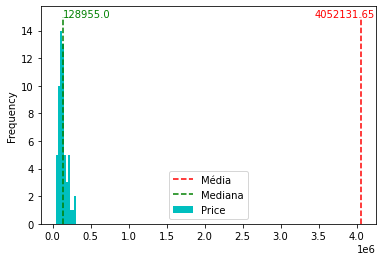

In [ ]:
media = casas.Price.mean()
mediana = casas.Price.median()

casas[casas.Price<10**8].Price.plot.hist(color="c")
plt.plot([media,media],[0,15],"r--",label="Média")
plt.plot([mediana,mediana],[0,15],"g--",label="Mediana")
plt.text(media-0.6*10**6,15,str(media),color="r")
plt.text(mediana,15,str(mediana),color="g")
plt.legend()
plt.show()

## Intervalo Interquartil

O desvio padrão e a variância são afetados pelos outliers. Nós vimos que a mediana é robusta, então será que existe uma medida robusta para a variabilidade?

O intervalo interquartil atende esta característica, mas para entendê-lo, precisamos entender o que é percentil e quartil.

> **Percentil**: O *k*-ésimo percentil ($percentil(\{x\},k)$) de um conjunto de dados $\{x\}$ é o valor que separa os $k\%$ valores menores ou iguais a ele.

> **Quartil**: O primeiro quartil dos dados é o percentil 25. O segundo quartil é o percentil 50, que é a mediana. O terceiro quartil é o percentil 75.

Observe que o percentil é uma generalização do quartil que é, por sua vez, uma generalização da mediana. A ideia é buscar o valor dos dados que separa um certo percentual dos dados (em termos de quantidade).

> **Intervalo Interquartil**:
$ iqr(\{x\}) = percentil({x},75) - percentil({x},25)$

* Estima o quanto os dados estão dispersos, mas se comporta melhor na presença de outliers.
* Medida de escala / variabilidade
* Propriedades
* $iqr(\{x+c\}) = iqr(\{x\})$
* $iqr(\{kx\}) = k*iqr(\{x\})$
* Diferentemente do desvio padrão, o IQR é um intervalo e não uma medida pontual

In [ ]:
iqr = casas.Price.quantile(0.75)-casas.Price.quantile(0.25)
print("Intervalo interquartil para o preço das casas: "+str(iqr))
print("Desvio Padrão para o preço das casas: "+str(casas.Price.std(ddof=0)))
casasSemOutlier = casas[casas.Price < 10**8]
iqr = casasSemOutlier.Price.quantile(0.75)-casasSemOutlier.Price.quantile(0.25)
print("")
print("Intervalo interquartil para o preço das casas sem Outlier: "+str(iqr))
print("Desvio Padrão para o preço das casas sem Outlier: "+str(casasSemOutlier.Price.std(ddof=0)))

Intervalo interquartil para o preço das casas: 59151.0
Desvio Padrão para o preço das casas: 30080574.72829087

Intervalo interquartil para o preço das casas sem Outlier: 61749.0
Desvio Padrão para o preço das casas sem Outlier: 57168.209262891636


# Interpretação de dados e gráficos

## Diagrama de Caixa (box plot)


* Comparar dois ou mais histogramas (mesmo de dados normalizados) não é tão fácil.

> **Problemas**: se sobrepostos vão esconder informação, se em gráficos distintos as escalas dos eixos podem atrapalhar

* **Diagramas de caixa** facilitam comparações e são uma forma concisa de ver diversas medidas de um conjunto de dados em um mesmo gráfico.

> **Medidas representadas**: primeiro quartil ($Q_1$), Mediana ($Q_2$), terceiro quartil ($Q_3$) e o IQR ($Q_3-Q_1$).

>**Destaques**: São destacados no gráfico os outliers, definidos como os dados maiores que $Q_3+1.5*IQR$ ou menores que $Q_1-1.5*IQR$, estes limites são denominados, superior e inferior, respectivamente. Outras formas de determinar os limites podem ser usadas (**ATENÇÃO**).

* Abaixo uma representação de um diagrama de caixa hipotético, destacando as medidas, limites e outliers. Pode ser representado verticalmente também.

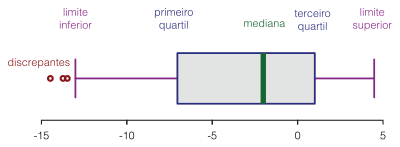

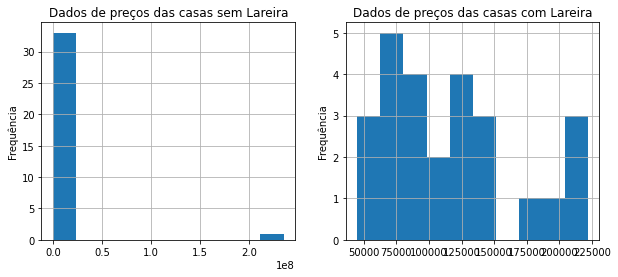

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


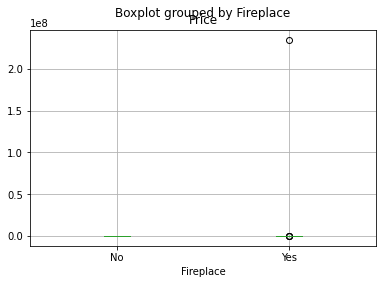

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


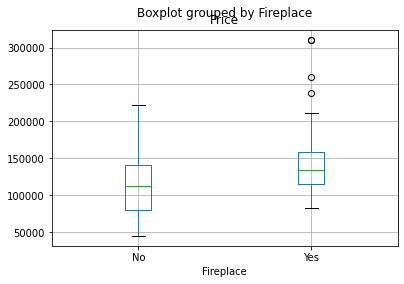

In [ ]:

casas_sem = casas[casas.Fireplace=="Yes"]
casas_com = casas[casas.Fireplace=="No"]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
casas_sem.Price.hist()
plt.title("Dados de preços das casas sem Lareira")
plt.ylabel("Frequência")
plt.subplot(1,2,2)
casas_com.Price.hist()
plt.title("Dados de preços das casas com Lareira")
plt.ylabel("Frequência")
plt.show()
casas.boxplot(column="Price",by="Fireplace")
plt.show()
casas_sem_outlier = casas[casas.Price < 10**6]
casas_sem_outlier.boxplot(column="Price",by="Fireplace")
plt.show()

## Dados Normais

* Dados podem ter escalas diferentes, e por isso histogramas podem ser de dificíl comparação
> Ex: comparar variáveis de unidades diferentes (altura e peso); comparar a distribuição dos salários de um país do Norte Europeu contra um país da África sub-saariana.
* Nós podemos **padronizar** um conjunto de dados, i.e., mexer na localização e escala dos dados de modo a serem comparáveis.
* Existem diversas formas de padronização, sendo uma delas a **normalização**
* Para **normalizar** um conjunto de dados $\{x\}$ fazemos

> $\hat{x}_i=\frac{x_i-\bar{x}}{\sigma_x}$

* Os dados normalizados $\{\hat{x}\}$ possuem média 0 e desvio padrão 1 (as propriedades da média e do desvio padrão garantem isso)

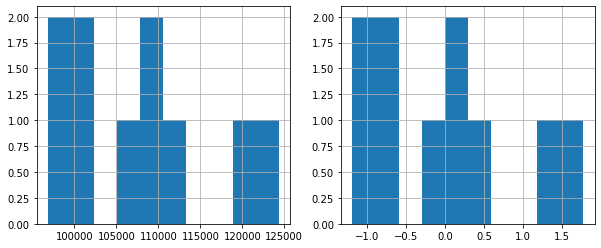

In [ ]:
import matplotlib.pyplot as plt

media = salarios.salarios.mean()
desvio = salarios.salarios.std()

plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
salarios.salarios.hist()
plt.subplot(1,2,2)
salarios.salarios.sub(media).div(desvio).hist()

* Dizer que os dados estão normalizados não significa que os dados sejam **normais**
* **Dados são dito normais** se, para uma amostra razoável, <u>o histograma dos dados normalizados se aproximam da curva normal padrão</u>,
* A **curva normal padrão** é dada por
$f(x) = \frac{1}{\sqrt{2\pi}}e^{(\frac{-x^2}{2})}$
* Se os dados são normais, temos que:
  * Os dados não possuem assimetria significativa
  * Aproximadamente 68% dos dados estão dentro de 1 desvio padrao da média
  * Aproximadamente 95% dos dados estão dentro de 2 desvios padrao da média
  * Aproximadamente 99.7% dos dados estão dentro de 3 desvios padrao da média

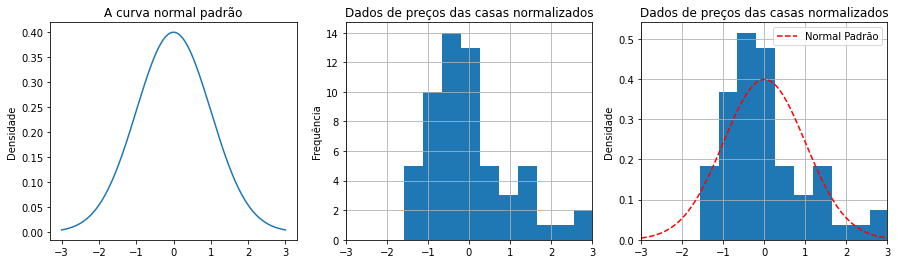

Área sob a curva com 1 desvios padrão 0.6827
Área sob a curva com 2 desvios padrão 0.9545
Área sob a curva com 3 desvios padrão 0.9973


In [ ]:
from math import sqrt, e, pi
import numpy as np
import matplotlib.pyplot as plt

#Vamos remover o outlier destes dados
casas_sem_outlier = casas[casas.Price < 10**6]
media = casas_sem_outlier.Price.mean()
desvio = casas_sem_outlier.Price.std()
casas_normal = casas_sem_outlier.Price.sub(media).div(desvio)

def f(x):
  return (1/sqrt(2*pi))*e**(-(x**2)/2)

x_normal = np.linspace(-3, 3, num=1000, endpoint=True)

plt.figure(figsize=(15, 4))

plt.subplot(1,3,1)
plt.plot(x_normal,f(x_normal))
plt.title("A curva normal padrão")
plt.ylabel("Densidade")
plt.subplot(1,3,2)
casas_normal.hist()
plt.title("Dados de preços das casas normalizados")
plt.ylabel("Frequência")
plt.xlim(-3,3)
plt.subplot(1,3,3)
casas_normal.hist(density=True)
plt.plot(x_normal,f(x_normal),"r--",label="Normal Padrão")
plt.title("Dados de preços das casas normalizados")
plt.ylabel("Densidade")
plt.xlim(-3,3)
plt.legend()
plt.show()

#Area sob a curva
for i in [1,2,3]:
  x_normal = np.linspace(-i, i, num=1000, endpoint=True)
  area = np.trapz(f(x_normal),x_normal)
  print("Área sob a curva com "+str(i)+" desvios padrão "+str(round(area,4)))

##Histogramas

Podem relevar detalhes sobre a **moda**, **assimetria** e efeito de **cauda longa**.

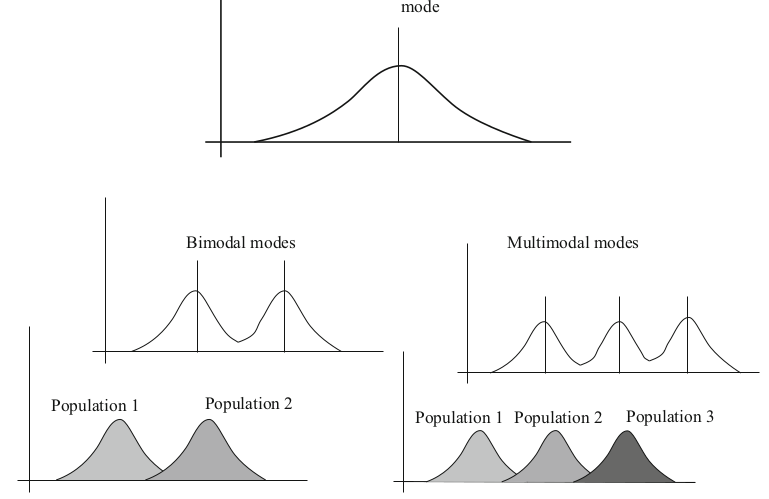

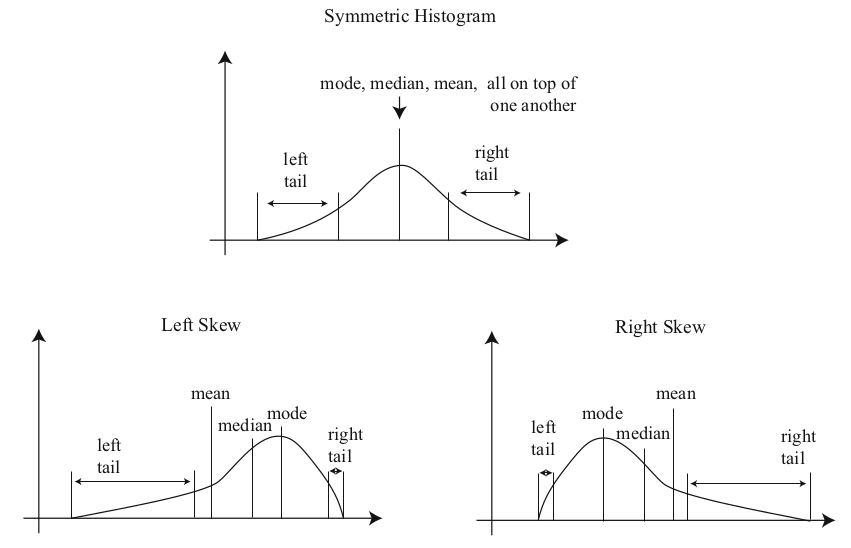

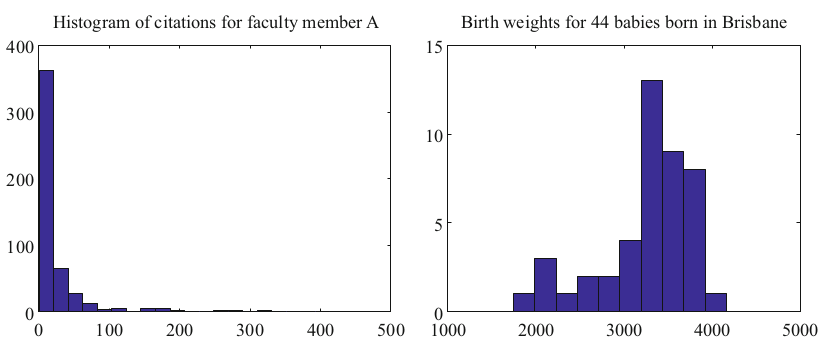

In [ ]:
# A moda é o valor que aparece mais comumente
casas.Price.mode()

0    122221
1    206512
dtype: int64

##Como saber se meus dados são normalmente distribuídos?

A forma mais segura de determinar isso é utilizando testes de hipótese, contudo, podemos usar um método gráfico muito útil.

O gráfico de quantis (em inglês chama-se *quantile-quantile plot*, ou de forma resumida Q-Q plot) permite verificar relações entre a distribuição de um conjunto de dados com a distribuição de outro conjunto de dados.

Para duas amostras $X$ e $Y$, este relacionamento é observado computando os percentis ($\{P^X_1, P^X_2, P^X_n\}$ para $X$ e $\{P^Y_1, P^Y_2, P^Y_n\}$ para $Y$) de cada conjunto de dados e traçando em um gráfico cada par $(P^X_i,P^Y_i)$ como um ponto.

Também é possível fazer o mesmo gráfico considerando um conjunto de dados contra uma distribuição de probabilidade teórica. Desta forma, podemos verificar se um conjunto de dados se adequa bem a uma distribuição normal, por exemplo.

--2021-11-09 23:32:24--  http://jse.amstat.org/datasets/kidsfeet.dat.txt
Resolving jse.amstat.org (jse.amstat.org)... 107.180.48.28
Connecting to jse.amstat.org (jse.amstat.org)|107.180.48.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1638 (1.6K) [text/plain]
Saving to: ‘kidsfeet.dat.txt.9’

kidsfeet.dat.txt.9  100%[===================>]   1.60K  --.-KB/s    in 0s      

2021-11-09 23:32:24 (154 MB/s) - ‘kidsfeet.dat.txt.9’ saved [1638/1638]



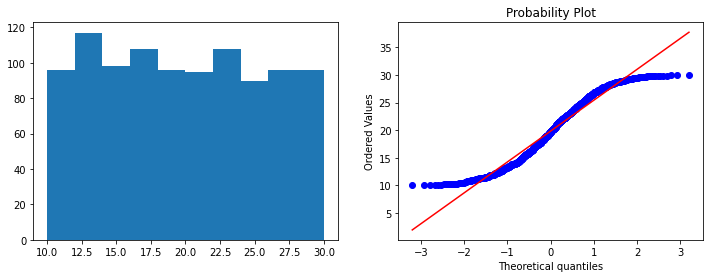

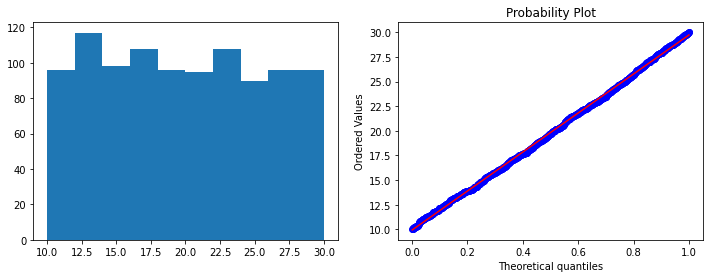

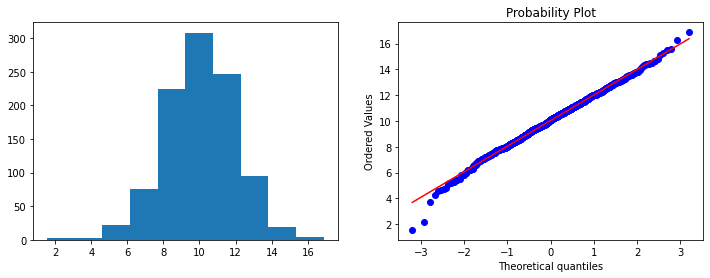

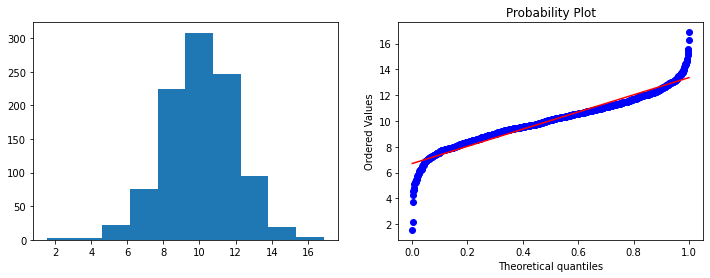

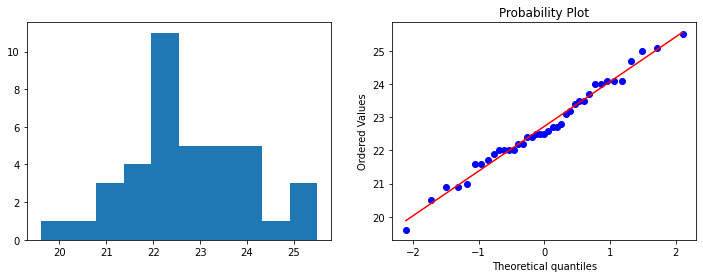

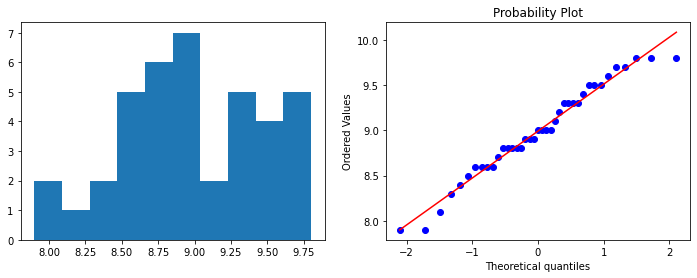

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

!wget http://jse.amstat.org/datasets/kidsfeet.dat.txt
pes = pd.read_csv("kidsfeet.dat.txt",delim_whitespace=True,header=None,names=["Birthmonth","Birthyear","Length","Width",
                                                                  "Sex","Foot","Right_Left_handedness"])

def qqanalise(dados,distr="norm"):
  plt.figure(figsize=(12,4))
  plt.subplot(1,2,1)
  plt.hist(dados)
  plt.subplot(1,2,2)
  stats.probplot(dados, dist=distr,plot=plt)
  plt.show()

u = stats.uniform.rvs(10,20,size=1000)
qqanalise(u)
qqanalise(u,"uniform")
n = stats.norm.rvs(10,2,size=1000)
qqanalise(n)
qqanalise(n,"uniform")
qqanalise(pes.Length)
qqanalise(pes.Width)

#**Bônus**: Calculando Média e Desvio de forma *online*

Pense na situação em que você deve computar a média de dados que estão chegando a cada intervalo de tempo. Será que precisamos armazenar estes dados e refazer todas as contas sempre quando um novo dado chega?

Não, **a média pode ser estimada online, bastando guardar os dados da média calculada no passo anterior**.

Assumindo que $t$ é inteiro, crescente e registra a quantidade de valores já computados; que $x_t$ é o valor recebido agora no tempo $t$; e que $\bar{x}_{t-1}$ é a média calculada anteriormente, temos que a média atual ($\bar{x}_t$) pode ser calculada por

$\bar{x}_{t} = \frac{(t-1)\bar{x}_{t-1}+x_t}{t}$

Um estimador similar a este existe para o desvio padrão. Veja mais aqui: https://www.johndcook.com/blog/standard_deviation/

In [ ]:
media = salarios["salarios"].mean()
desvio = salarios["salarios"].std(ddof=0)
novo_valor = {"salarios": 92532}
salarios_novo = salarios.append(novo_valor,ignore_index=True)
t = 11

media_online = ((t-1)*media + novo_valor["salarios"])/t

print("Média anterior: "+str(media))
print("Média calculada com novo dado: "+str(salarios_novo["salarios"].mean()))
print("Média calculada com novo dado e online: "+str(media_online))

Média anterior: 107903.0
Média calculada com novo dado: 106505.63636363637
Média calculada com novo dado e online: 106505.63636363637
